# Integrantes: Fabio Lancellotti

# Imports

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [140]:
COVID = pd.read_csv('Covid Data.csv')

# Descriptivos

In [141]:
len(COVID)

1048575

In [142]:
COVID.head ()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [143]:
COVID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [144]:
COVID.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

# Eliminamos los datos con valores nulos (97, 98 o 99)

In [145]:
columnas_verificar = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
                      'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
                      'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
                      'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']
COVID1 = COVID[~COVID[columnas_verificar].isin([97, 98, 99]).any(axis=1)]

In [146]:
COVID1.head ()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2
16,2,1,1,2,9999-99-99,2,1,80,2,2,...,2,2,1,2,2,2,2,2,3,1
56,2,1,1,2,9999-99-99,1,1,58,2,2,...,2,2,1,2,1,1,2,2,7,1


In [147]:
len(COVID1)

76832

# Eliminamos lo que no vamos a utilizar

In [148]:
COVID1.drop ('USMER', axis = 1, inplace = True)
COVID1.drop ('MEDICAL_UNIT', axis = 1, inplace = True)
COVID1.drop ('INMSUPR', axis = 1, inplace = True)
COVID1.drop ('CLASIFFICATION_FINAL', axis = 1, inplace = True)
COVID1.drop ('ICU', axis = 1, inplace = True)
COVID1.drop ('SEX', axis = 1, inplace = True)

C:\Users\Fabio\AppData\Local\Temp\ipykernel_13144\2447098155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COVID1.drop ('USMER', axis = 1, inplace = True)
C:\Users\Fabio\AppData\Local\Temp\ipykernel_13144\2447098155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COVID1.drop ('MEDICAL_UNIT', axis = 1, inplace = True)
C:\Users\Fabio\AppData\Local\Temp\ipykernel_13144\2447098155.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [149]:
COVID1.head ()

,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
5,2,9999-99-99,2,1,40,2,2,2,2,2,2,2,2,2,2
8,2,9999-99-99,2,2,37,2,1,2,2,1,2,2,1,2,2
9,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2
16,2,9999-99-99,2,1,80,2,2,2,2,1,2,2,2,2,2
56,2,9999-99-99,1,1,58,2,2,2,2,1,2,1,1,2,2


In [150]:
COVID1.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 76832 entries, 5 to 1048569
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PATIENT_TYPE    76832 non-null  int64 
 1   DATE_DIED       76832 non-null  object
 2   INTUBED         76832 non-null  int64 
 3   PNEUMONIA       76832 non-null  int64 
 4   AGE             76832 non-null  int64 
 5   PREGNANT        76832 non-null  int64 
 6   DIABETES        76832 non-null  int64 
 7   COPD            76832 non-null  int64 
 8   ASTHMA          76832 non-null  int64 
 9   HIPERTENSION    76832 non-null  int64 
 10  OTHER_DISEASE   76832 non-null  int64 
 11  CARDIOVASCULAR  76832 non-null  int64 
 12  OBESITY         76832 non-null  int64 
 13  RENAL_CHRONIC   76832 non-null  int64 
 14  TOBACCO         76832 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 9.4+ MB


In [151]:
COVID1.columns

Index(['PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT',
       'DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OTHER_DISEASE',
       'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO'],
      dtype='object')

<Axes: xlabel='INTUBED', ylabel='count'>

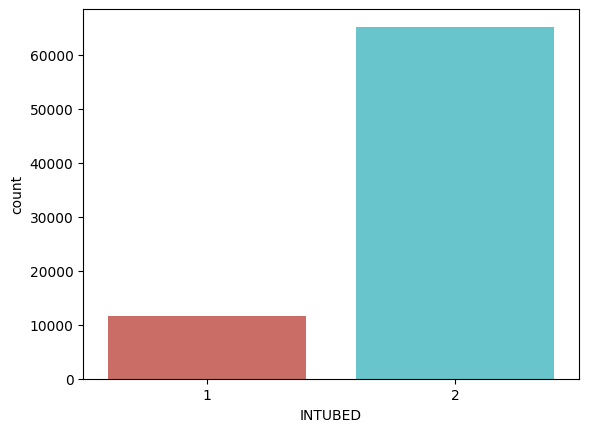

In [152]:
sns.countplot(x='INTUBED' , data=COVID1 , palette='hls')

<Axes: xlabel='ASTHMA', ylabel='count'>

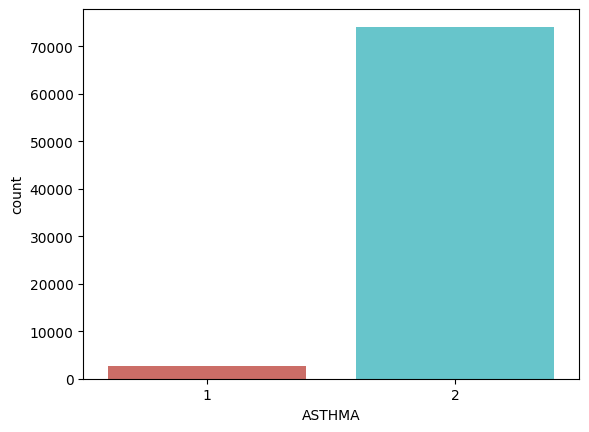

In [153]:
sns.countplot(x='ASTHMA' , data=COVID1 , palette='hls')

<Axes: xlabel='COPD', ylabel='count'>

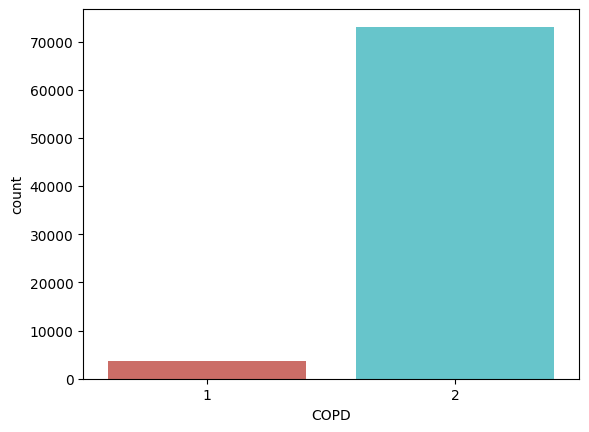

In [154]:
sns.countplot(x='COPD' , data=COVID1 , palette='hls')

# Ejercicio Regresiones:

In [155]:
COVID1['DATE_DIED'] = (COVID1['DATE_DIED'] != '9999-99-99').astype(int)

C:\Users\Fabio\AppData\Local\Temp\ipykernel_13144\1116221112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COVID1['DATE_DIED'] = (COVID1['DATE_DIED'] != '9999-99-99').astype(int)


In [156]:
COVID1.head ()

,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
5,2,0,2,1,40,2,2,2,2,2,2,2,2,2,2
8,2,0,2,2,37,2,1,2,2,1,2,2,1,2,2
9,2,0,2,2,25,2,2,2,2,2,2,2,2,2,2
16,2,0,2,1,80,2,2,2,2,1,2,2,2,2,2
56,2,0,1,1,58,2,2,2,2,1,2,1,1,2,2


<Axes: xlabel='DATE_DIED', ylabel='count'>

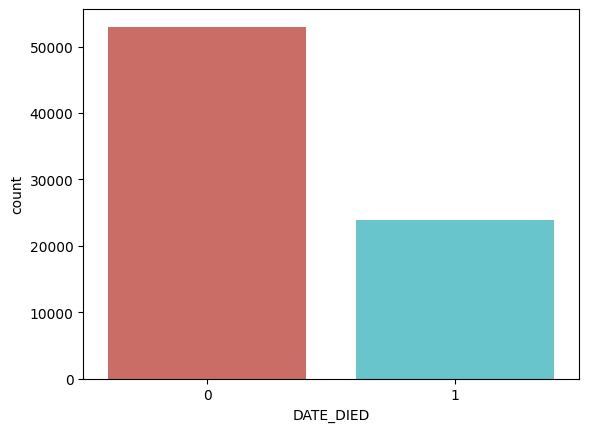

In [157]:
sns.countplot(x='DATE_DIED' , data=COVID1 , palette='hls')

In [158]:
columna = ['PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'PNEUMONIA', 'AGE',
                     'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION',
                     'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
                     'TOBACCO']
COVID1[columna] = COVID1[columna].replace({2: 0, 1: 1})

C:\Users\Fabio\AppData\Local\Temp\ipykernel_13144\2419981704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COVID1[columna] = COVID1[columna].replace({2: 0, 1: 1})


In [159]:
COVID1.head ()

,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
5,0,0,0,1,40,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,37,0,1,0,0,1,0,0,1,0,0
9,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0
16,0,0,0,1,80,0,0,0,0,1,0,0,0,0,0
56,0,0,1,1,58,0,0,0,0,1,0,1,1,0,0


In [161]:
COVID1['AGE'] = COVID1['AGE'].apply(lambda x: 0 if x <= 59 else 1)

C:\Users\Fabio\AppData\Local\Temp\ipykernel_13144\1012308835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COVID1['AGE'] = COVID1['AGE'].apply(lambda x: 0 if x <= 59 else 1)


In [162]:
COVID1.head ()

,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
56,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0


## Hipótesis Regresión Lineal:

### H1: La intubación de un paciente depende de si su edad es mayor a 60 años y si es consumidor de tabaco.

In [164]:
formula_reg_lin = "INTUBED ~ AGE + TOBACCO"
modelo_lin = smf.ols(formula_reg_lin, COVID1).fit()
modelo_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                INTUBED   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     403.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.38e-175
Time:                        16:41:53   Log-Likelihood:                -29828.
No. Observations:               76832   AIC:                         5.966e+04
Df Residuals:                   76829   BIC:                         5.969e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1213      0.002     71.689      0.000       0.118       0.125
AGE            0.0744      0.003     28.420      0.000       0.069       0.080
TOBACCO       -0.0022      0.006     -0.342      0.733      -0.015       0.010
==============================================================================
Omnibus:                    24544.501   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56569.546
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                       4.742   Cond. No.                         5.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Se rechaza la hipótesis H1. Observando los coeficientes se observa que fumar tabaco o no no afecta a la desición de entubar a un paciente, por otro lado la edad si puede afectar a esta desición pero no es determinante.
### En cocnlusión, el modelo propuesto no es adecuado para predecir si un paciente será entubado o no.

## Hipótesis Regresión Logística

### H2: Que un paciente muera o nó, depende de su historial de enfermedades, de su edad y si consume tabaco o no.

In [170]:
formula_reg_log = "DATE_DIED ~ DIABETES + COPD + ASTHMA + HIPERTENSION + OTHER_DISEASE + CARDIOVASCULAR + OBESITY + RENAL_CHRONIC + TOBACCO"

modelo_log = smf.logit(formula_reg_log, COVID1).fit()
modelo_log.summary()

Optimization terminated successfully.
         Current function value: 0.597453
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              DATE_DIED   No. Observations:                76832
Model:                          Logit   Df Residuals:                    76822
Method:                           MLE   Df Model:                            9
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                 0.03555
Time:                        16:52:47   Log-Likelihood:                -45904.
converged:                       True   LL-Null:                       -47596.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2318      0.012   -102.182      0.000      -1.255      -1.208
DIABETES           0.4722      0.018     26.420      0.000       0.437       0.507
COPD               0.2659      0.036      7.488      0.000       0.196       0.336
ASTHMA            -0.3923      0.047     -8.422      0.000      -0.484      -0.301
HIPERTENSION       0.5685      0.018     31.973      0.000       0.534       0.603
OTHER_DISEASE      0.1641      0.031      5.224      0.000       0.103       0.226
CARDIOVASCULAR    -0.0017      0.035     -0.050      0.960      -0.071       0.067
OBESITY            0.1134      0.019      5.953      0.000       0.076       0.151
RENAL_CHRONIC      0.1893      0.032      5.977      0.000       0.127       0.251
TOBACCO           -0.1771      0.040     -4.438      0.000      -0.255      -0.099
==================================================================================
"""

### Dentro de los resultados observamos que algunas variables no son estadísticamente significativas para determinar relacion con la muerte o no del paciente (coeficientes negativos). Por otro lado si bien existen coeficentes que relacionan variables como hipertensión y diabetes con la variable dependiente de si muere o no el paciente, estos no muestran una fuerte relación.

### En cocnlusión, la muerte de un paciente depednerá de otros factores más que los facotres analizados. Algunos de los factores si afectan a la muerte de un paciente pero en baja proporción.